In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
%matplotlib inline

In [2]:
FB = pd.read_csv('FB.csv')
FB1 = pd.read_csv('FB.csv')

In [3]:
def ichimoku_cloud(df,w9,w26,w52,chikou26):
    #crypto settings are 20, 60, 120, 30 see Josh video for confirmation
    #https://www.youtube.com/watch?v=5x0r-qcGoQQ&t=1s
    
    
    # Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
    df['period9_high'] = pd.Series.rolling(df['High'], w9).max()
    df['period9_low'] = pd.Series.rolling(df['Low'], w9).min()
    df['tenkan_sen'] = (df['period9_high'] + df['period9_low']) / 2
    
    # Kijun-sen (Base Line): (26-period high + 26-period low)/2))
    df['period26_high'] = pd.Series.rolling(df['High'], w26).max()
    df['period26_low'] = pd.Series.rolling(df['Low'], w26).min()
    df['kijun_sen'] = (df['period26_high'] + df['period26_low']) / 2
    
    df['period52_high'] = pd.Series.rolling(df['High'], w52).max()
    df['period52_low'] = pd.Series.rolling(df['Low'], w52).min()
    df['senkou_span_b'] = (df['period52_high'] + df['period52_low'] ) /2 
    
    df ['chikou_span'] = df['Close'].shift(chikou26) 
    return df


In [4]:
ichimoku_cloud(FB,9,26,52,26)
FB.dropna(inplace = True)

In [5]:

def returns_df(df):
    df['position'] = None
    df['position1'] = None
    for row in range(len(df)):
        if df['tenkan_sen'].iloc[row] > df['kijun_sen'].iloc[row]:
            df['position'].iloc[row] = 1
        else:
            df['position'].iloc[row] = -1

    for row in range(len(df)):
        if df['Adj Close'].iloc[row] > df['senkou_span_b'].iloc[row]:
            df['position1'].iloc[row] = 1
        else:
            df['position1'].iloc[row] = -1
    df['position'].fillna(method = 'ffill', inplace = True)
    df['position1'].fillna(method = 'ffill', inplace = True)
    df['market return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    df['strategy return tk'] = df['position'] * df['market return']
    df['strategy return price'] = df['position1'] * df['market return']
    
            
    return df

In [6]:
returns_df(FB)

C:\Users\scheng\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Date,Open,High,Low,Close,Adj Close,Volume,period9_high,period9_low,tenkan_sen,...,kijun_sen,period52_high,period52_low,senkou_span_b,chikou_span,position,position1,market return,strategy return tk,strategy return price
51,2012-08-01,21.500000,21.580000,20.840000,20.879999,20.879999,44604400,29.490000,20.840000,25.165000,...,27.140000,45.000000,20.840000,32.920000,32.060001,-1,-1,NaN,NaN,NaN
52,2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,29.490000,19.820000,24.655000,...,26.360001,36.660000,19.820000,28.240000,33.099998,-1,-1,-0.041061,0.041061,0.041061
53,2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,29.490000,19.820000,24.655000,...,26.350001,33.590000,19.820000,26.705000,32.230000,-1,-1,0.051069,-0.051069,-0.051069
54,2012-08-06,21.389999,22.150000,21.299999,21.920000,21.920000,27778900,29.490000,19.820000,24.655000,...,26.350001,33.450001,19.820000,26.635001,31.360001,-1,-1,0.038600,-0.038600,-0.038600
55,2012-08-07,22.200001,22.450001,20.500000,20.719999,20.719999,36782900,28.230000,19.820000,24.025000,...,26.350001,33.450001,19.820000,26.635001,31.100000,-1,-1,-0.056300,0.056300,0.056300
56,2012-08-08,20.709999,21.150000,20.219999,20.719999,20.719999,29537400,24.540001,19.820000,22.180000,...,26.350001,33.450001,19.820000,26.635001,30.770000,-1,-1,0.000000,-0.000000,-0.000000
57,2012-08-09,20.750000,21.170000,20.610001,21.010000,21.010000,15610700,24.040001,19.820000,21.930000,...,26.350001,33.450001,19.820000,26.635001,31.200001,-1,-1,0.013899,-0.013899,-0.013899
58,2012-08-10,21.410000,21.820000,21.129999,21.809999,21.809999,25794700,23.370001,19.820000,21.595001,...,26.350001,33.450001,19.820000,26.635001,31.469999,-1,-1,0.037370,-0.037370,-0.037370
59,2012-08-13,22.150000,22.450001,21.400000,21.600000,21.600000,24973100,22.450001,19.820000,21.135001,...,26.350001,33.450001,19.820000,26.635001,31.730000,-1,-1,-0.009675,0.009675,0.009675
60,2012-08-14,21.410000,21.600000,20.250000,20.379999,20.379999,39308800,22.450001,19.820000,21.135001,...,26.150000,33.450001,19.820000,26.635001,32.169998,-1,-1,-0.058139,0.058139,0.058139


In [7]:
FB.dropna(inplace = True)

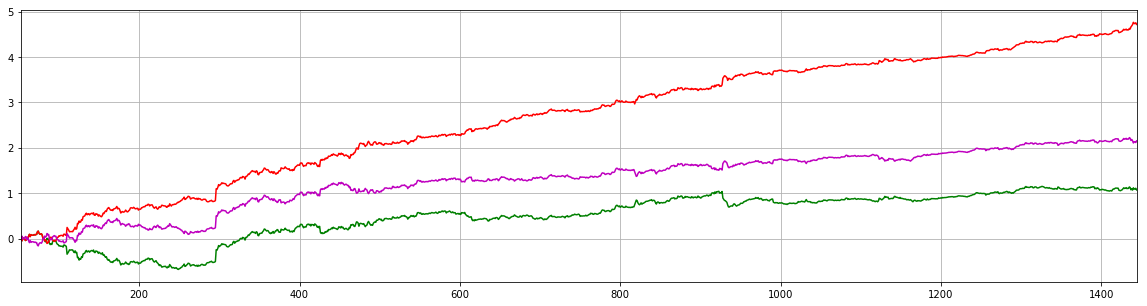

In [9]:
FB['strategy return tk'].cumsum().plot(grid = True, figsize = (20,5), color = 'g')
FB['strategy return price'].cumsum().plot(grid = True, figsize = (20,5), color = 'r')
FB['market return'].cumsum().plot(grid = True, figsize = (20,5), color = 'm')

In [11]:
def risk_measures(df):
    pass
#sharpe, calmar, max drawdown

In [15]:
FB['strategy return price'].cumsum().tail(5)

1440    4.765302
1441    4.739242
1442    4.737540
1443    4.756193
1444    4.720065
Name: strategy return price, dtype: float64

In [16]:
FB

,Date,Open,High,Low,Close,Adj Close,Volume,period9_high,period9_low,tenkan_sen,...,kijun_sen,period52_high,period52_low,senkou_span_b,chikou_span,position,position1,market return,strategy return tk,strategy return price
52,2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,29.490000,19.820000,24.655000,...,26.360001,36.660000,19.820000,28.240000,33.099998,-1,-1,-0.041061,0.041061,0.041061
53,2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,29.490000,19.820000,24.655000,...,26.350001,33.590000,19.820000,26.705000,32.230000,-1,-1,0.051069,-0.051069,-0.051069
54,2012-08-06,21.389999,22.150000,21.299999,21.920000,21.920000,27778900,29.490000,19.820000,24.655000,...,26.350001,33.450001,19.820000,26.635001,31.360001,-1,-1,0.038600,-0.038600,-0.038600
55,2012-08-07,22.200001,22.450001,20.500000,20.719999,20.719999,36782900,28.230000,19.820000,24.025000,...,26.350001,33.450001,19.820000,26.635001,31.100000,-1,-1,-0.056300,0.056300,0.056300
56,2012-08-08,20.709999,21.150000,20.219999,20.719999,20.719999,29537400,24.540001,19.820000,22.180000,...,26.350001,33.450001,19.820000,26.635001,30.770000,-1,-1,0.000000,-0.000000,-0.000000
57,2012-08-09,20.750000,21.170000,20.610001,21.010000,21.010000,15610700,24.040001,19.820000,21.930000,...,26.350001,33.450001,19.820000,26.635001,31.200001,-1,-1,0.013899,-0.013899,-0.013899
58,2012-08-10,21.410000,21.820000,21.129999,21.809999,21.809999,25794700,23.370001,19.820000,21.595001,...,26.350001,33.450001,19.820000,26.635001,31.469999,-1,-1,0.037370,-0.037370,-0.037370
59,2012-08-13,22.150000,22.450001,21.400000,21.600000,21.600000,24973100,22.450001,19.820000,21.135001,...,26.350001,33.450001,19.820000,26.635001,31.730000,-1,-1,-0.009675,0.009675,0.009675
60,2012-08-14,21.410000,21.600000,20.250000,20.379999,20.379999,39308800,22.450001,19.820000,21.135001,...,26.150000,33.450001,19.820000,26.635001,32.169998,-1,-1,-0.058139,0.058139,0.058139
61,2012-08-15,20.639999,21.410000,20.400000,21.200001,21.200001,47861100,22.450001,19.900000,21.175000,...,25.689999,33.450001,19.820000,26.635001,31.469999,-1,-1,0.039447,-0.039447,-0.039447
